In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from skimpy import skim
import sweetviz as sv
import IPython
from ydata_profiling import ProfileReport

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
# import for model saveing
import joblib

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Skimpy :\ ek lightweight Python library hai jo dataframes ko summarize aur explore karne ke liye design ki gayi hai. Yeh library data analysis ke initial stages mein users ko quick insights provide karti hai aur data ke distribution, types, aur basic statistics ko samajhne mein madad karti hai.

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1338   │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 7      │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ age             │   0 │      0 │   39.21 │   14.05 │      18 │     27 │     39 │     51 │     64 │ ▇▆▅▆▆▅  │  │
│ │ bmi             │   0 │      0 │   30.66 │   6.098 │   15.96 │   26.3 │   30.4 │  34.69 │  53.13 │  ▂▆▇▅▁  │  │
│ │ children        │   0 │      0 │   1.095 │   1.205 │       0 │      0 │      1 │      2 │      5 │  ▇▅▃▂   │  │
│ │ charges         │   0 │      0 │   13270 │   12110 │    1122 │   4740 │   9382 │  16640 │  63770 │  ▇▃▁▁   │  │
│ └─────────────────┴─────┴────────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sex                       │       0 │          0 │                            1 │                     1338 │  │
│ │ smoker                    │       0 │          0 │                            1 │                     1338 │  │
│ │ region                    │       0 │          0 │                            1 │                     1338 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Dataprep :\ ek Python library hai jo data preparation tasks ko simplify karne ke liye design ki gayi hai. Yeh library data scientists aur analysts ko data cleaning, transformation, aur exploration mein madad karti hai, jisse unhe data analysis ke core aspects par focus karne mein help milti hai.**

Sweetviz : \ ek Python library hai jo data analysis ko automate karta hai aur detailed insights provide karta hai. Yeh library data exploration ke liye use hoti hai aur data scientists aur analysts ko data ke patterns aur relationships ko samajhne mein madad karti hai.

                                             |          | [  0%]   00:00 -> (? left)


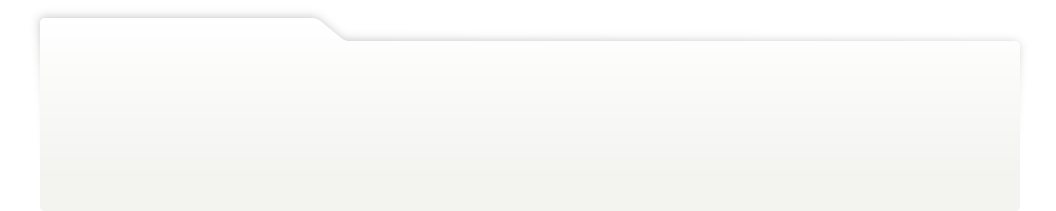
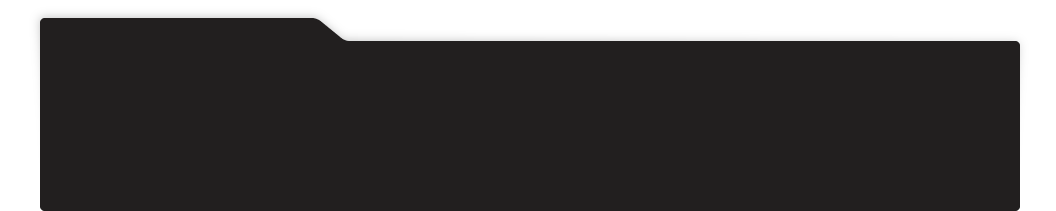
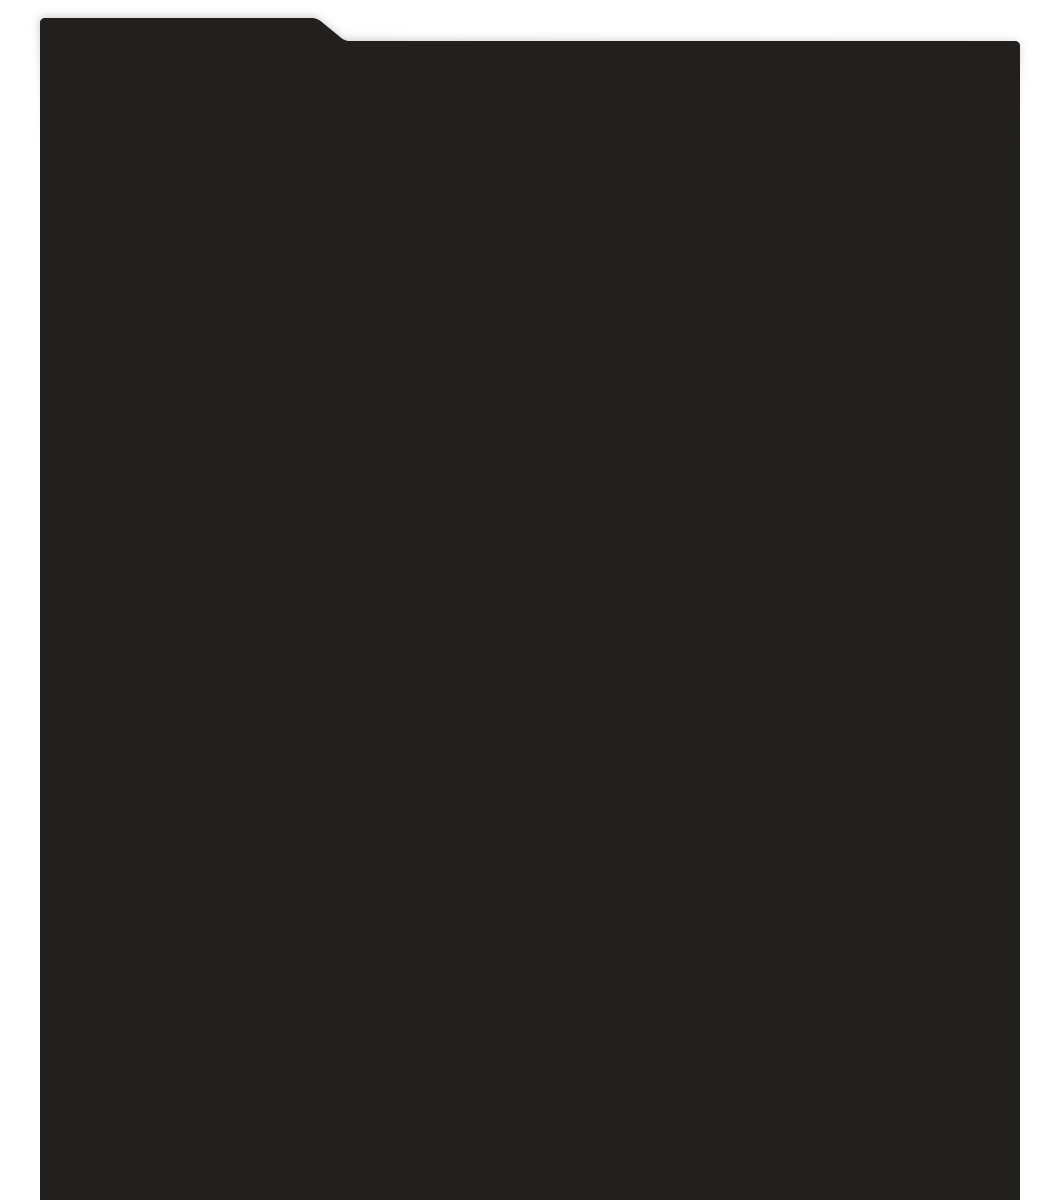
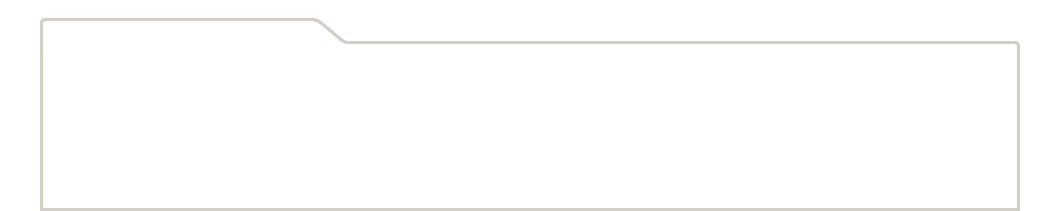
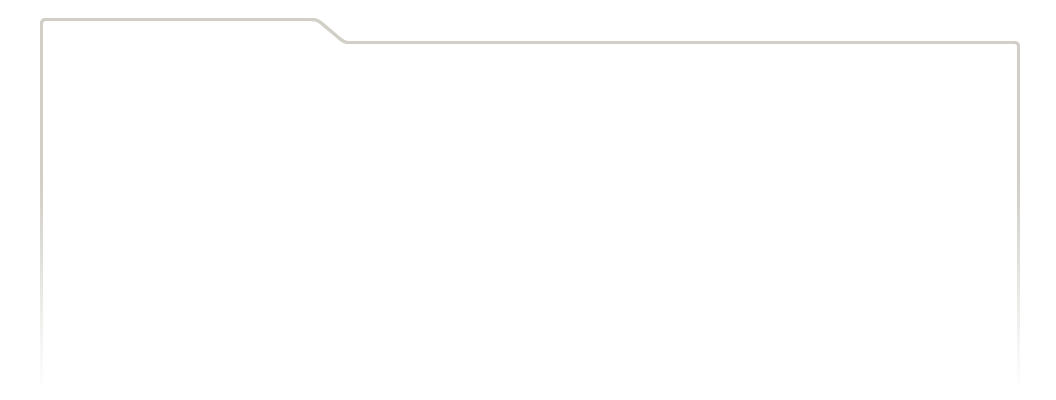
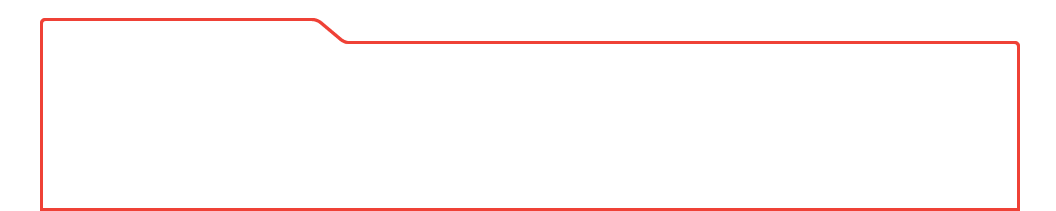
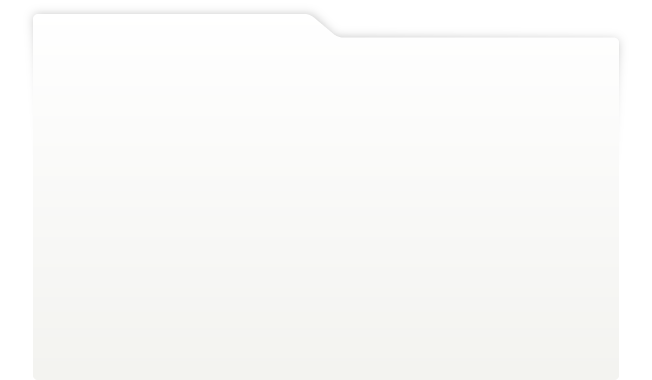
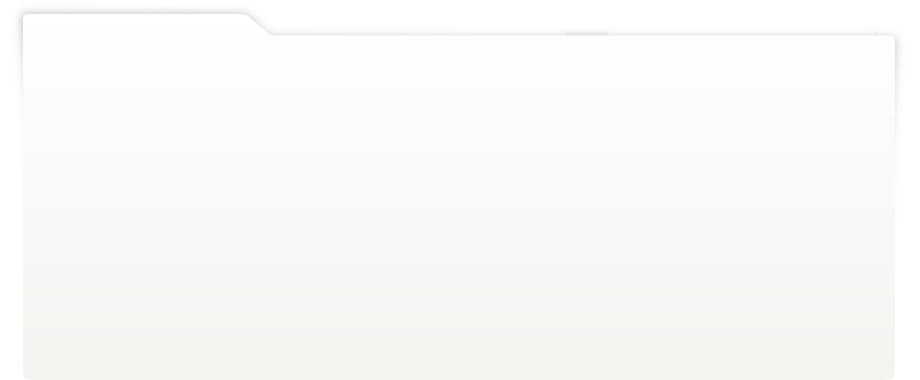
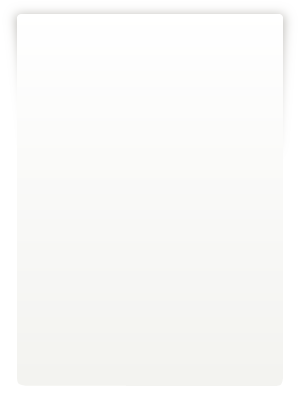
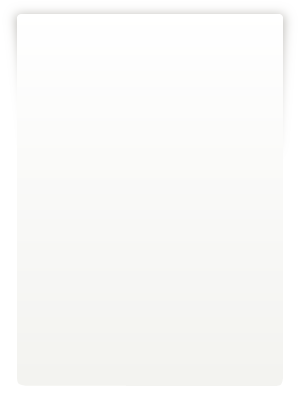
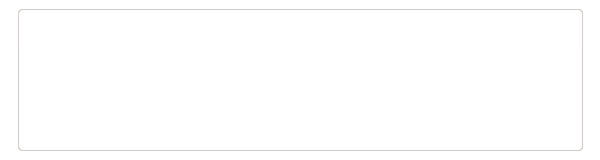
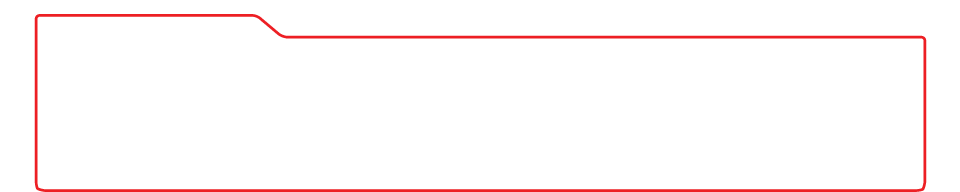
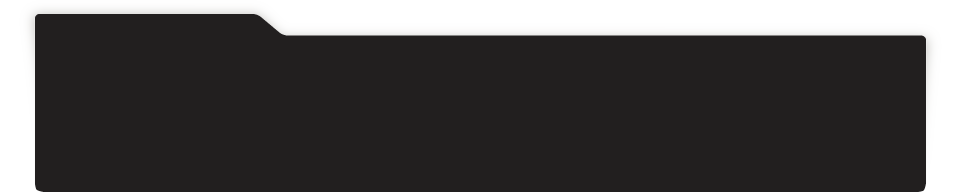
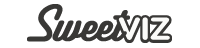
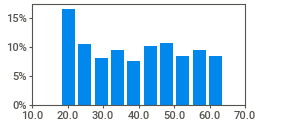
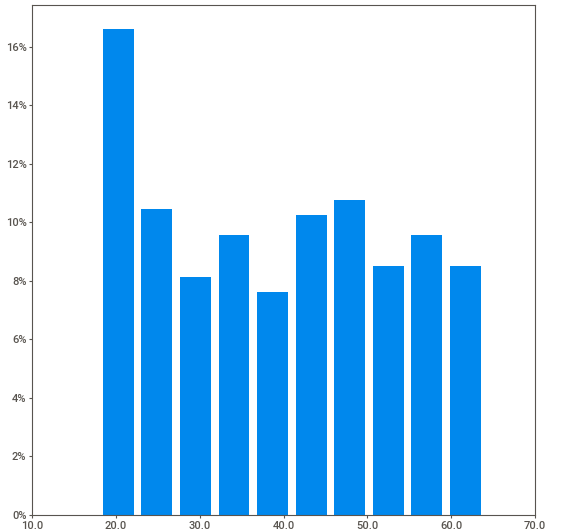
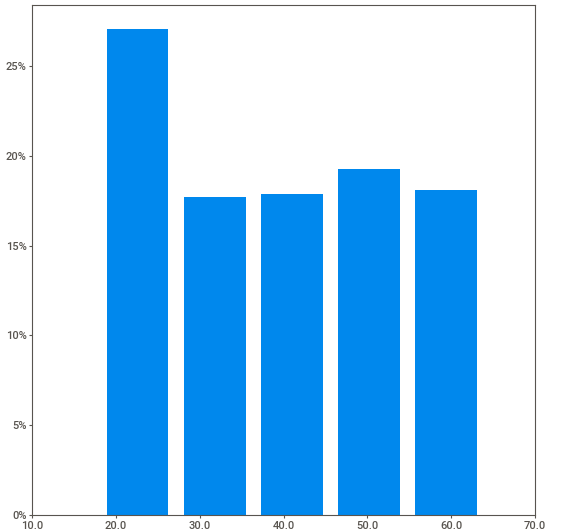
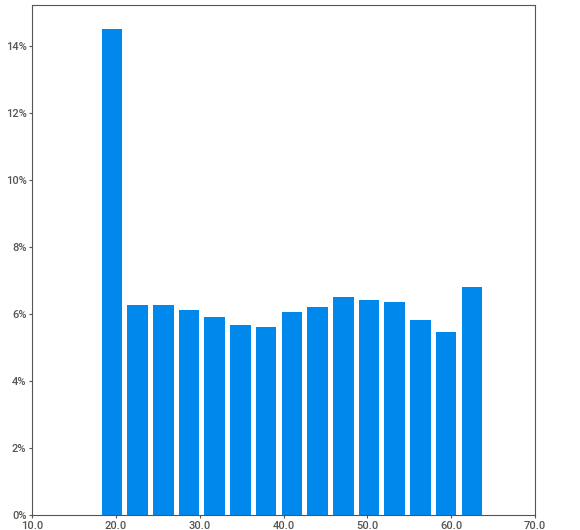
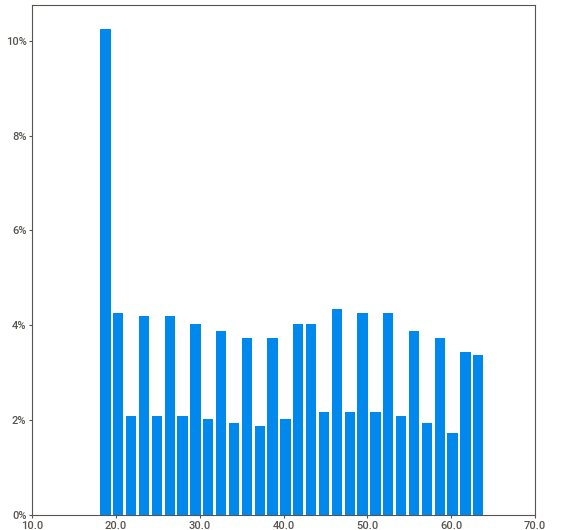
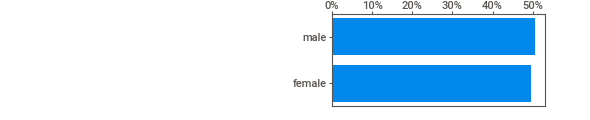
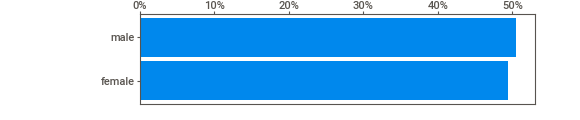
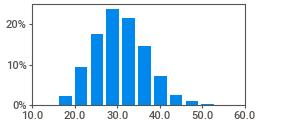
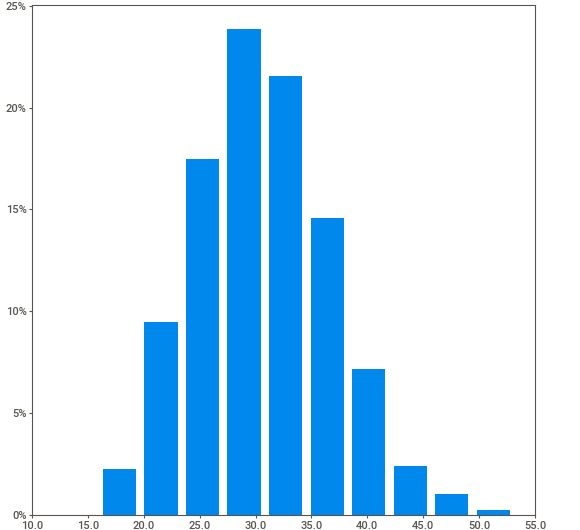
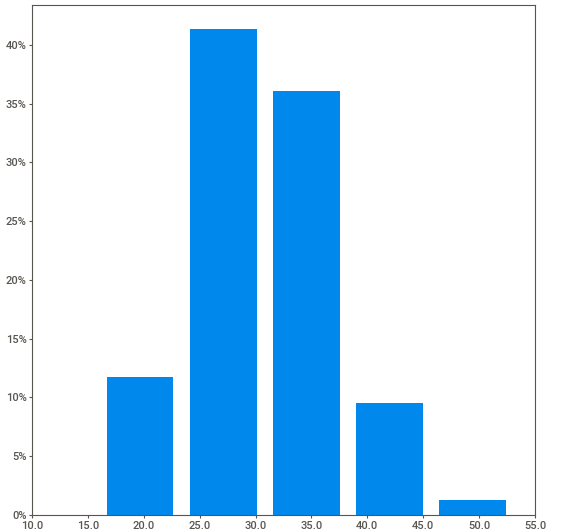
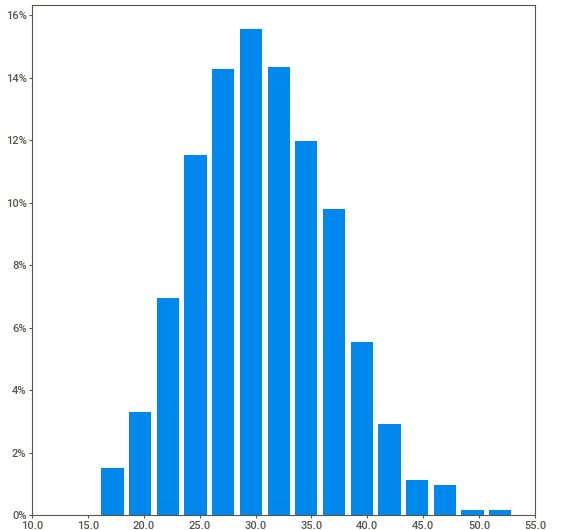
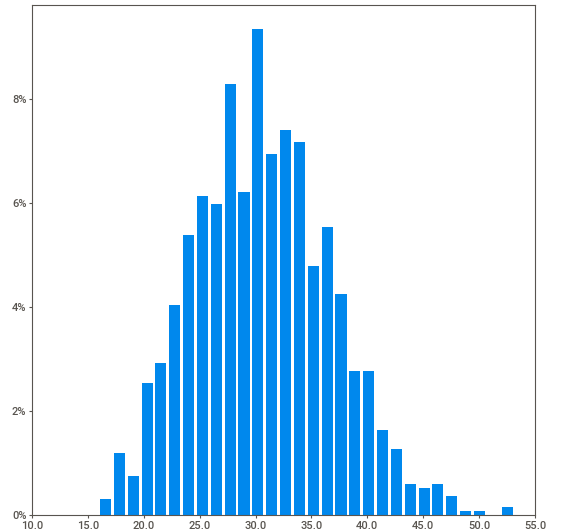
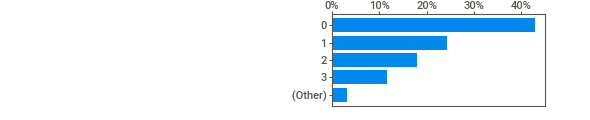
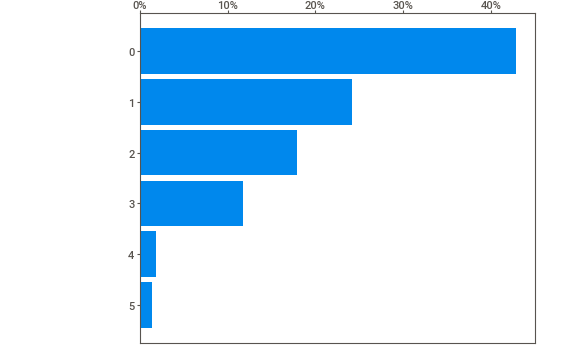
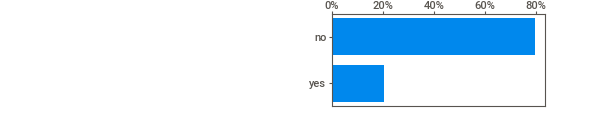
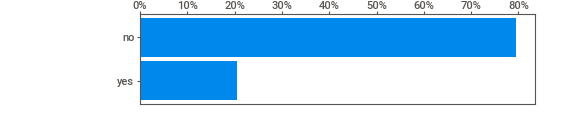
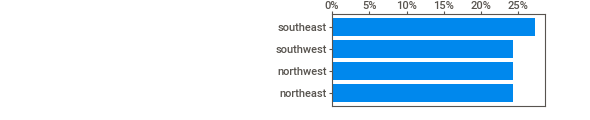
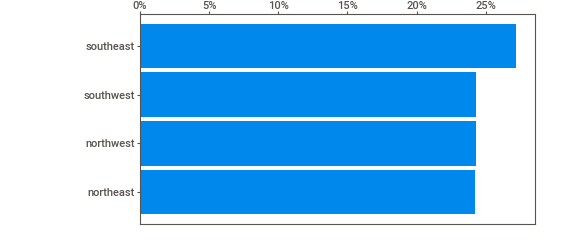
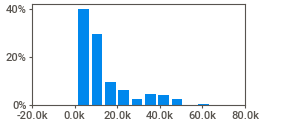
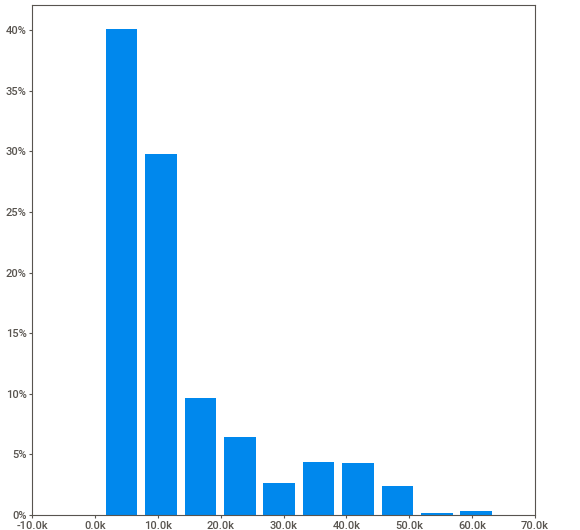
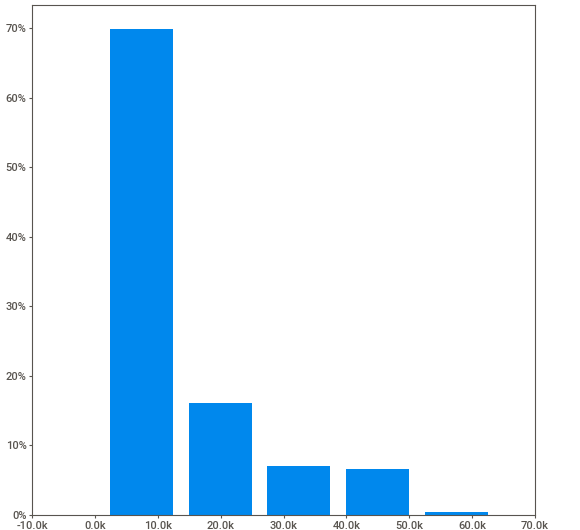
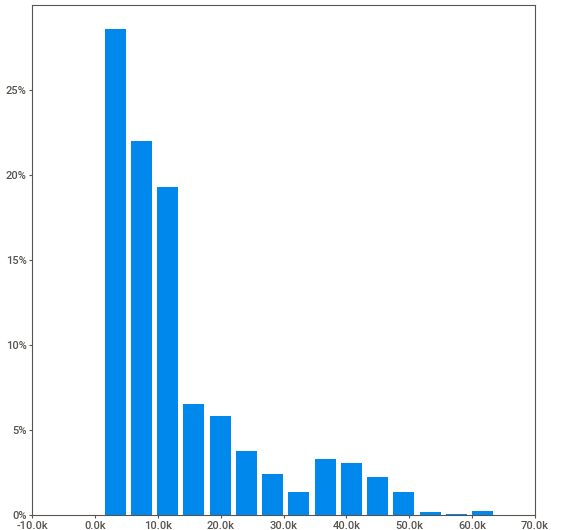
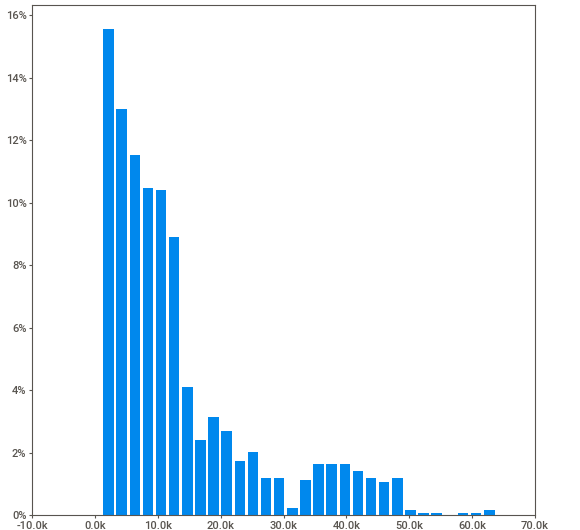
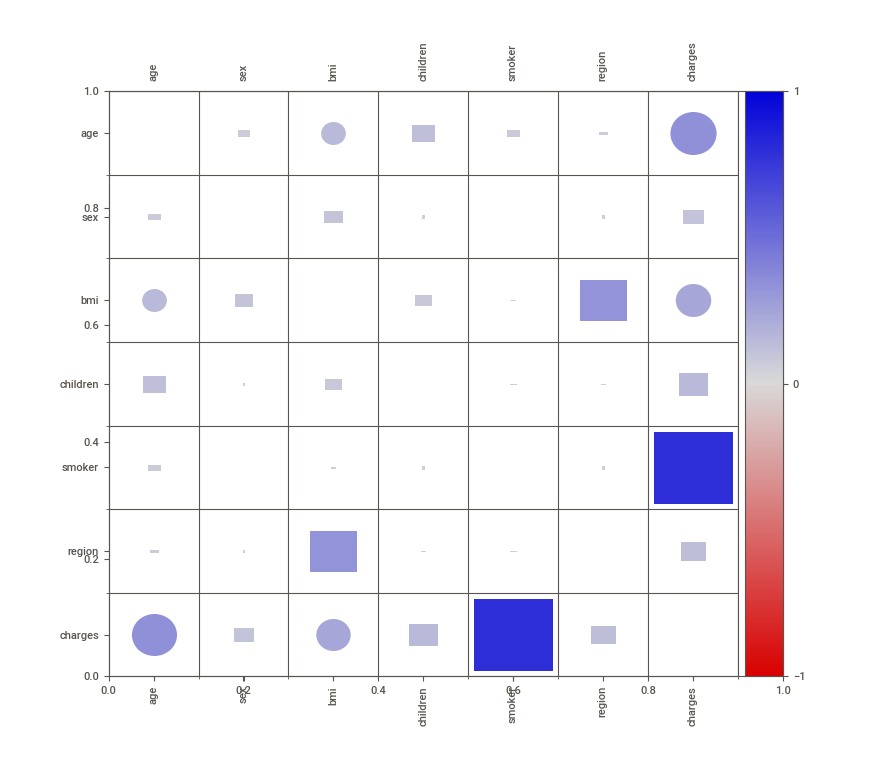
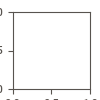

In [7]:
report = sv.analyze(df)
report.show_notebook()

YData Profiling : \ ek advanced data profiling tool hai jo data scientists, analysts, aur engineers ko data quality aur insights gain karne mein help karta hai. Yeh tool comprehensive data analysis aur visualization capabilities offer karta hai, jisse users data ke complexities ko samajhne mein madad milti hai.

In [8]:
profile = ProfileReport(df, title = "Y Data Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df.duplicated().sum()

1

In [13]:
df = pd.get_dummies(df, drop_first = True)

In [15]:
bool_cols = df.select_dtypes(include = "bool").columns.to_list()
for col in bool_cols:
    df[col] = df[col].map({True : 1, False : 0})
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [17]:
X = df.drop("charges", axis = 1)
y = df['charges']

In [19]:
df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [21]:
df.drop_duplicates(inplace = True)

In [23]:
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state = 33, test_size = 0.2)

In [33]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [35]:
rfr = RandomForestRegressor()
scores = cross_val_score(rfr, X_train, y_train, cv = 10, n_jobs = -1)

In [37]:
scores.mean()

0.8307105302852783

In [49]:
estimators1 = [
    ("rfr", RandomForestRegressor(n_estimators = 100)),
    ("abc", AdaBoostRegressor(n_estimators = 100)),
    ("br", BaggingRegressor(n_estimators = 100)),
    ("etr", ExtraTreesRegressor(n_estimators = 100)),
    ("gbr", GradientBoostingRegressor(n_estimators = 100))
]

In [51]:
sc = StackingRegressor(estimators = estimators1, final_estimator = XGBRegressor(), n_jobs = -1)

In [53]:
estimators2 = [
    ("est", sc),
    ("xgbr", XGBRegressor()),
    ("catboost", CatBoostRegressor()),
    ("lgbm", LGBMRegressor())
]

In [55]:
final = StackingRegressor(estimators = estimators2, final_estimator = RandomForestRegressor(), n_jobs = -1)
final.fit(X_train, y_train)

StackingRegressor(estimators=[('est',
                               StackingRegressor(estimators=[('rfr',
                                                              RandomForestRegressor()),
                                                             ('abc',
                                                              AdaBoostRegressor(n_estimators=100)),
                                                             ('br',
                                                              BaggingRegressor(n_estimators=100)),
                                                             ('etr',
                                                              ExtraTreesRegressor()),
                                                             ('gbr',
                                                              GradientBoostingRegressor())],
                                                 final_estimator=XGBRegressor(base_score=None,
                                                                              booster=None,
                                                                              callbacks=None,
                                                                              colsample_bylevel=None,
                                                                              co...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x000001DCEABE4320>),
                              ('lgbm', LGBMRegressor())],
                  final_estimator=RandomForestRegressor(), n_jobs=-1)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, final.predict(X_test))

0.7976608745493652